<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M3/notebooks/Simple_LSTM_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas-datareader

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas_datareader import data as pdr
import datetime as dt

import seaborn as sns
sns.set()

In [ ]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

In [ ]:
data =  pdr.DataReader("^OMXC25",'yahoo', start=start, end=end)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 454 entries, 2020-01-02 to 2021-11-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       454 non-null    float64
 1   Low        454 non-null    float64
 2   Open       454 non-null    float64
 3   Close      454 non-null    float64
 4   Volume     454 non-null    float64
 5   Adj Close  454 non-null    float64
dtypes: float64(6)
memory usage: 24.8 KB


In [ ]:
data_diff = data.diff()

In [ ]:
data_diff

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-7.609985,-14.589966,-2.229980,-15.699951,3900.0,-15.699951
2020-01-06,-14.929932,-17.719971,-14.929932,-2.390015,386800.0,-2.390015
2020-01-07,16.679932,17.510010,3.049927,5.809937,977500.0,5.809937
2020-01-08,-12.089966,-5.229980,-0.229980,-1.939941,9220800.0,-1.939941
...,...,...,...,...,...,...
2021-11-10,-12.679932,-17.540039,8.780029,-17.109985,-830600.0,-17.109985
2021-11-11,13.359985,12.810059,-9.010010,27.699951,228800.0,27.699951
2021-11-12,17.029907,31.380005,22.500000,17.459961,683700.0,17.459961


In [ ]:
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# normalizing
scaler = MinMaxScaler(feature_range=(-1, 1))
data_diff['Adj_Close_scaled'] = scaler.fit_transform(data_diff['Adj Close'].values.reshape(-1, 1))

In [ ]:
# create targets by shifting
data_diff['Adj_Close_scaled+1'] = data_diff.Adj_Close_scaled.shift(-1, fill_value=data_diff.Adj_Close_scaled.iloc[-1])

In [ ]:
# get the data as matrix
data_p = data_diff.iloc[1:,6:].values.astype('float32')

In [ ]:
data_p

In [ ]:
# split into train and test sets
train_size = int(len(data_p) * 0.67)
test_size = len(data_p) - train_size

train, test = data_p[0:train_size,:], data_p[train_size:len(data_p),:]
print(len(train), len(test))

303 150


In [ ]:
X_train = train[:,0]
y_train = train[:,1]

X_test = test[:,0]
y_test = test[:,1]

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))

In [ ]:
X_train.shape

(303, 1, 1)

In [ ]:
# build the network

model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4)                 96        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=2)

Epoch 1/50
16/16 - 7s - loss: 0.1750 - 7s/epoch - 420ms/step
Epoch 2/50
16/16 - 0s - loss: 0.1565 - 61ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 0.1410 - 64ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 0.1274 - 79ms/epoch - 5ms/step
Epoch 5/50
16/16 - 0s - loss: 0.1163 - 78ms/epoch - 5ms/step
Epoch 6/50
16/16 - 0s - loss: 0.1069 - 63ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0990 - 63ms/epoch - 4ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0923 - 60ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0867 - 65ms/epoch - 4ms/step
Epoch 10/50
16/16 - 0s - loss: 0.0826 - 63ms/epoch - 4ms/step
Epoch 11/50
16/16 - 0s - loss: 0.0790 - 64ms/epoch - 4ms/step
Epoch 12/50
16/16 - 0s - loss: 0.0763 - 62ms/epoch - 4ms/step
Epoch 13/50
16/16 - 0s - loss: 0.0743 - 59ms/epoch - 4ms/step
Epoch 14/50
16/16 - 0s - loss: 0.0730 - 62ms/epoch - 4ms/step
Epoch 15/50
16/16 - 0s - loss: 0.0721 - 62ms/epoch - 4ms/step
Epoch 16/50
16/16 - 0s - loss: 0.0714 - 63ms/epoch - 4ms/step
Epoch 17/50
16/16

In [ ]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.96 RMSE
Test Score: 18.64 RMSE


In [ ]:
data_diff['Adj_close_pred'] = data_diff['Adj Close']

In [ ]:
data_diff['Adj_close_pred'].iloc[-testPredict.shape[0]:] = testPredict.flatten()

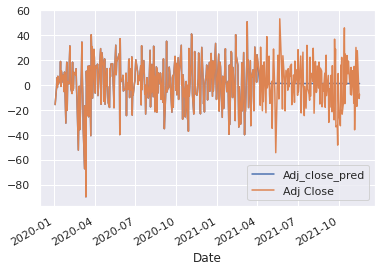

In [ ]:
data_diff.loc[:,['Adj_close_pred','Adj Close']].plot()

In [ ]:
pred_sign = pd.DataFrame(zip(testPredict.flatten(), y_test.flatten())) > 0

In [ ]:
pred_sign

,0,1
0,True,False
1,True,True
2,True,True
3,True,False
4,True,True
...,...,...
145,True,True
146,True,True
147,True,False
148,True,False


In [ ]:
(pred_sign[0] == pred_sign[1]).sum()/len(pred_sign)

0.56

Introducing multi-step

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 5
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [ ]:
# build the network

model = Sequential()
model.add(LSTM(16, input_shape=(look_back, 1), return_sequences=True))
model.add(LSTM(4, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 16)             1152      
                                                                 
 lstm_3 (LSTM)               (None, 4)                 336       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,493
Trainable params: 1,493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
297/297 - 4s - loss: 0.0770 - 4s/epoch - 14ms/step
Epoch 2/10
297/297 - 1s - loss: 0.0725 - 1s/epoch - 4ms/step
Epoch 3/10
297/297 - 1s - loss: 0.0721 - 1s/epoch - 4ms/step
Epoch 4/10
297/297 - 1s - loss: 0.0721 - 1s/epoch - 4ms/step
Epoch 5/10
297/297 - 1s - loss: 0.0730 - 1s/epoch - 4ms/step
Epoch 6/10
297/297 - 1s - loss: 0.0721 - 1s/epoch - 4ms/step
Epoch 7/10
297/297 - 1s - loss: 0.0714 - 1s/epoch - 4ms/step
Epoch 8/10
297/297 - 1s - loss: 0.0718 - 1s/epoch - 4ms/step
Epoch 9/10
297/297 - 1s - loss: 0.0722 - 1s/epoch - 4ms/step
Epoch 10/10
297/297 - 1s - loss: 0.0720 - 1s/epoch - 4ms/step


In [ ]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 19.07 RMSE
Test Score: 18.74 RMSE


In [ ]:
data_diff['Adj_close_pred'] = data_diff['Adj Close']

In [ ]:
data_diff['Adj_close_pred'].iloc[-testPredict.shape[0]:] = testPredict.flatten()

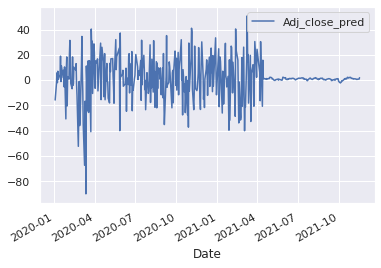

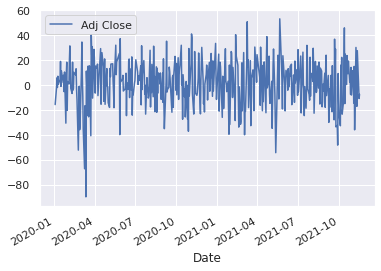

In [ ]:
data_diff.loc[:,['Adj_close_pred']].plot()
data_diff.loc[:,['Adj Close']].plot()

In [ ]:
pred_sign = pd.DataFrame(zip(testPredict.flatten(), y_test.flatten())) > 0
(pred_sign[0] == pred_sign[1]).sum()/len(pred_sign)

0.5416666666666666

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
ETH =  pdr.DataReader('ETH-USD','yahoo', start=start, end=end)
BTC =  pdr.DataReader('BTC-USD','yahoo', start=start, end=end)
ADA =  pdr.DataReader('ADA-USD','yahoo', start=start, end=end)
DOGE =  pdr.DataReader('DOGE-USD','yahoo', start=start, end=end)
BNB =  pdr.DataReader('BNB-USD','yahoo', start=start, end=end)

In [ ]:
data = pd.DataFrame({'ETH':ETH['Adj Close'], 
                     'BTC':BTC['Adj Close'], 
                     'ADA':ADA['Adj Close'], 
                     'DOGE': DOGE['Adj Close'], 
                     'BNB':BNB['Adj Close']})

In [ ]:
data

,ETH,BTC,ADA,DOGE,BNB
Date,,,,,
2020-01-01,130.802002,7200.174316,0.033458,0.002033,13.689083
2020-01-02,127.410179,6985.470215,0.032751,0.002009,13.027011
2020-01-03,134.171707,7344.884277,0.034180,0.002145,13.660452
2020-01-04,135.069366,7410.656738,0.034595,0.002241,13.891512
2020-01-05,136.276779,7411.317383,0.034721,0.002419,14.111019
...,...,...,...,...,...
2021-11-13,4651.460449,64469.527344,2.053104,0.261706,650.104126
2021-11-14,4626.358887,65466.839844,2.040853,0.262912,650.918091
2021-11-15,4557.503906,63557.871094,2.015587,0.256529,633.048645


In [ ]:
data = data.sort_index(ascending=True)

In [ ]:
data['ADA_shift'] = data['ADA'].shift(-1, fill_value=data['ADA'].iloc[-1])

In [ ]:
test_size = int(len(data) * 0.2) # the test data will be 20% (0.2) of the entire data
train = data.iloc[:-test_size,:].copy() 
# the copy() here is important, it will prevent us from getting: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_index,col_indexer] = value instead
test = data.iloc[-test_size:,:].copy()
print(train.shape, test.shape)

(547, 6) (136, 6)


In [ ]:
train

,ETH,BTC,ADA,DOGE,BNB,ADA_shift
Date,,,,,,
2020-01-01,130.802002,7200.174316,0.033458,0.002033,13.689083,0.032751
2020-01-02,127.410179,6985.470215,0.032751,0.002009,13.027011,0.034180
2020-01-03,134.171707,7344.884277,0.034180,0.002145,13.660452,0.034595
2020-01-04,135.069366,7410.656738,0.034595,0.002241,13.891512,0.034721
2020-01-05,136.276779,7411.317383,0.034721,0.002419,14.111019,0.037272
...,...,...,...,...,...,...
2021-06-30,2274.547607,35040.835938,1.383472,0.254215,303.295868,1.335611
2021-07-01,2113.605469,33572.117188,1.335611,0.244549,288.218414,1.394397
2021-07-02,2150.040283,33897.046875,1.394397,0.245264,287.423096,1.406836


In [ ]:
X_train = train.iloc[:,:5].values
y_train = train.iloc[:,5].values

X_test = test.iloc[:,:5].values
y_test = test.iloc[:,5].values

In [ ]:
x_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1,1))

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1,1))

In [ ]:
n_input = 5 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(X_train, y_train, length=n_input, batch_size=b_size)


In [ ]:
print(generator[0][0].shape)

(32, 5, 5)


In [ ]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 150)               93600     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 93,751
Trainable params: 93,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=5)

Epoch 1/5
17/17 [==============================] - 2s 18ms/step - loss: 0.3828
Epoch 2/5
17/17 [==============================] - 0s 18ms/step - loss: 0.0361
Epoch 3/5
17/17 [==============================] - 0s 18ms/step - loss: 0.0173
Epoch 4/5
17/17 [==============================] - 0s 18ms/step - loss: 0.0103
Epoch 5/5
17/17 [==============================] - 0s 19ms/step - loss: 0.0095


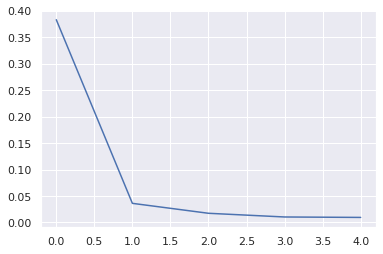

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [ ]:
test_generator = TimeseriesGenerator(X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

(32, 5, 5)


In [ ]:
y_pred_scaled = model.predict(test_generator)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test = y_scaler.inverse_transform(y_test)
results = pd.DataFrame({'y_true':y_test.flatten()[n_input:],'y_pred':y_pred.flatten()})
print(results)

       y_true    y_pred
0    1.348145  1.191011
1    1.315099  1.182162
2    1.265083  1.171225
3    1.262258  1.153763
4    1.223192  1.137876
..        ...       ...
126  2.040853  1.981250
127  2.015587  1.966845
128  1.877235  1.947822
129  1.826789  1.943764
130  1.826789  1.913081

[131 rows x 2 columns]


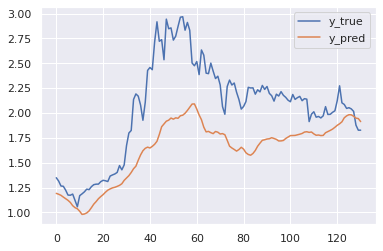

In [ ]:
results.plot()

In [ ]:
pred_sign = results.diff(1) > 0

In [ ]:
(pred_sign.y_true == pred_sign.y_pred).sum()/len(pred_sign)

0.5954198473282443